In [30]:
# Import the required libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
from wordcloud import WordCloud
from PIL import Image
from io import BytesIO
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd

In [31]:

# Define your Spotify API credentials

# Authenticate with the Spotify API



sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="",
                                               client_secret="",
                                               redirect_uri="https://www.google.com/",
                                               scope="user-library-read, user-read-currently-playing, user-top-read")) 
##sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Define the user whose liked songs you want to analyze
username = ""

# Initialize the list of liked songs
liked_songs = []


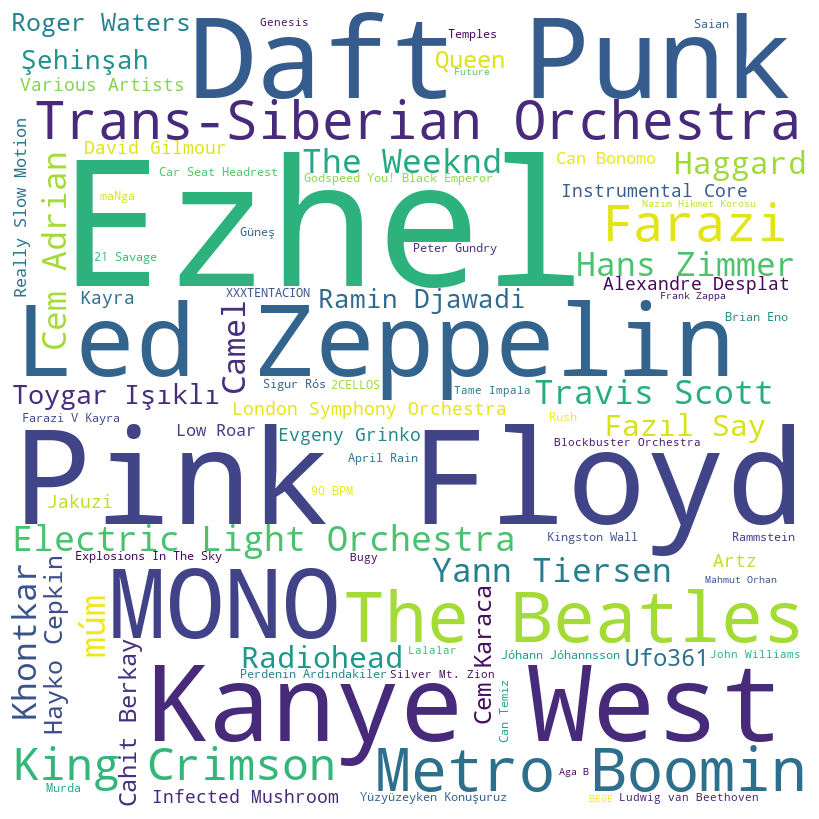

In [23]:
artist_dict = {}
offset = 0
while True:
    tracks = sp.current_user_saved_tracks(limit=50, offset=offset)

    for track in tracks['items']:
        artist_names = [artist['name'] for artist in track['track']['artists']]
        for artist in artist_names:
            if artist in artist_dict:
                artist_dict[artist] += 1
            else:
                artist_dict[artist] = 1

    if tracks['next'] == None:
        break
    offset += 50

wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      min_font_size=10).generate_from_frequencies(artist_dict)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

In [33]:
offset = 0
data = []
while True:
    tracks = sp.current_user_saved_tracks(limit=50, offset=offset)

    for track in tracks['items']:
        track_id = track['track']['id']
        track_attributes = sp.audio_features(track_id)[0]
        data.append(track_attributes)

    if tracks['next'] == None:
        break
    offset += 50

df = pd.DataFrame(data)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.266,0.997,11,-4.663,0,0.1300,0.000044,0.001670,0.0725,0.0599,180.007,audio_features,1qfYvgxevQ2OlpcKLqJ1Z2,spotify:track:1qfYvgxevQ2OlpcKLqJ1Z2,https://api.spotify.com/v1/tracks/1qfYvgxevQ2O...,https://api.spotify.com/v1/audio-analysis/1qfY...,300000,4
1,0.683,0.713,7,-4.375,0,0.0464,0.148000,0.000017,0.1130,0.1690,88.008,audio_features,4DGrMHTVjxecZbYStawUK1,spotify:track:4DGrMHTVjxecZbYStawUK1,https://api.spotify.com/v1/tracks/4DGrMHTVjxec...,https://api.spotify.com/v1/audio-analysis/4DGr...,199920,4
2,0.390,0.758,3,-6.329,1,0.0312,0.001140,0.829000,0.0978,0.0993,84.003,audio_features,3P4Vcz7MhJngRf8WUAaoA0,spotify:track:3P4Vcz7MhJngRf8WUAaoA0,https://api.spotify.com/v1/tracks/3P4Vcz7MhJng...,https://api.spotify.com/v1/audio-analysis/3P4V...,348053,4
3,0.486,0.892,9,-6.694,0,0.0367,0.000677,0.082100,0.2560,0.4070,129.990,audio_features,3iWZgDajFqkSTcjtrXhpfn,spotify:track:3iWZgDajFqkSTcjtrXhpfn,https://api.spotify.com/v1/tracks/3iWZgDajFqkS...,https://api.spotify.com/v1/audio-analysis/3iWZ...,181013,4
4,0.611,0.737,9,-9.586,1,0.0278,0.028200,0.157000,0.2430,0.4470,119.973,audio_features,7s38sKXK456BshLALkycXJ,spotify:track:7s38sKXK456BshLALkycXJ,https://api.spotify.com/v1/tracks/7s38sKXK456B...,https://api.spotify.com/v1/audio-analysis/7s38...,196627,4


In [34]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      3368 non-null   float64
 1   energy            3368 non-null   float64
 2   key               3368 non-null   int64  
 3   loudness          3368 non-null   float64
 4   mode              3368 non-null   int64  
 5   speechiness       3368 non-null   float64
 6   acousticness      3368 non-null   float64
 7   instrumentalness  3368 non-null   float64
 8   liveness          3368 non-null   float64
 9   valence           3368 non-null   float64
 10  tempo             3368 non-null   float64
 11  type              3368 non-null   object 
 12  id                3368 non-null   object 
 13  uri               3368 non-null   object 
 14  track_href        3368 non-null   object 
 15  analysis_url      3368 non-null   object 
 16  duration_ms       3368 non-null   int64  


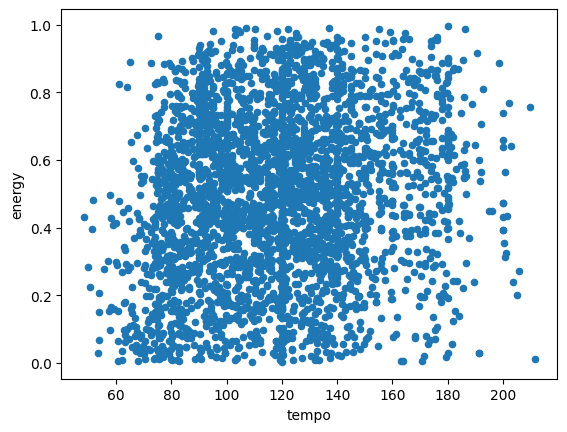

In [35]:
df.plot(x='tempo', y='energy', kind='scatter')
plt.show()

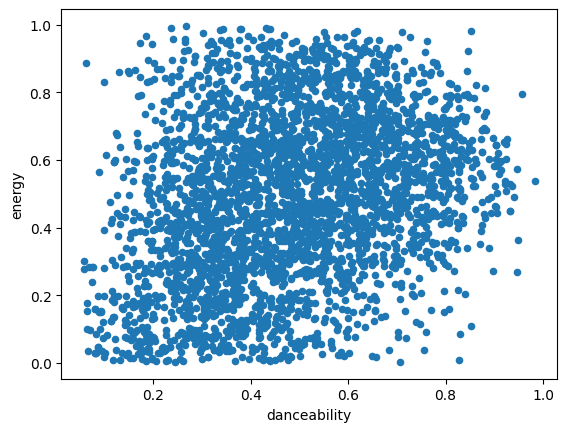

In [36]:
df.plot(x='danceability', y='energy', kind='scatter')
plt.show()

In [37]:
df[['energy', 'danceability']].corr()

,energy,danceability
energy,1.000000,0.296235
danceability,0.296235,1.000000


In [38]:
corr = df['danceability', 'energy', 'loudness','mode'].corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\utku.dogan\AppData\Local\Temp\ipykernel_19400\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.296235,-0.003255,0.341649,0.037742,0.331351,-0.223376,-0.350418,-0.016692,0.482364,0.031635,-0.286984,0.205953
energy,0.296235,1.000000,0.030461,0.794902,0.049374,0.217072,-0.681369,-0.329777,0.176390,0.432547,0.168436,0.018664,0.165708
key,-0.003255,0.030461,1.000000,0.028315,-0.174096,0.028289,-0.012999,-0.020683,-0.013221,0.033335,-0.010336,0.014244,0.005575
loudness,0.341649,0.794902,0.028315,1.000000,0.020642,0.180945,-0.574155,-0.427651,0.104574,0.352664,0.132947,0.000757,0.171383
mode,0.037742,0.049374,-0.174096,0.020642,1.000000,0.032579,-0.123389,-0.008857,0.015616,0.029151,0.011645,-0.001460,0.026909
speechiness,0.331351,0.217072,0.028289,0.180945,0.032579,1.000000,-0.129625,-0.249983,0.064625,0.177286,0.086269,-0.123471,0.050469
acousticness,-0.223376,-0.681369,-0.012999,-0.574155,-0.123389,-0.129625,1.000000,0.278312,-0.143465,-0.224657,-0.133358,-0.139779,-0.142583
instrumentalness,-0.350418,-0.329777,-0.020683,-0.427651,-0.008857,-0.249983,0.278312,1.000000,-0.124029,-0.360494,-0.084794,0.105391,-0.139153
liveness,-0.016692,0.176390,-0.013221,0.104574,0.015616,0.064625,-0.143465,-0.124029,1.000000,0.091289,0.025180,0.034143,0.025787
valence,0.482364,0.432547,0.033335,0.352664,0.029151,0.177286,-0.224657,-0.360494,0.091289,1.000000,0.126534,-0.226422,0.125026


<AxesSubplot: xlabel='danceability', ylabel='energy'>

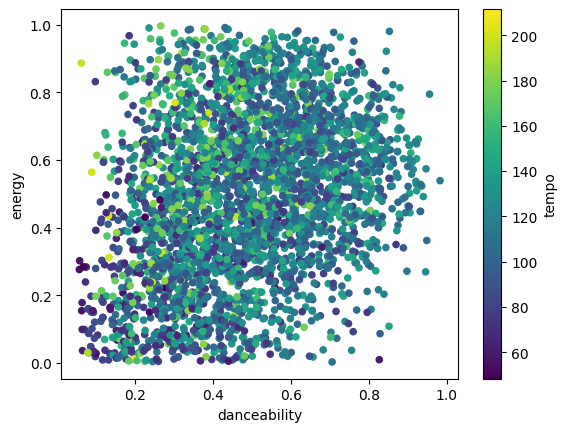

In [39]:
df.plot(x='danceability', y='energy', c='tempo', kind='scatter')

In [50]:
from sklearn.cluster import KMeans
features = ['danceability','energy', 'speechiness', 'acousticness']
X = df[features]

# Kümeleme modelini oluşturuyoruz
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Kümeleme sonucunu ekrana yazdırıyoruz
print("Kümeler:", kmeans.labels_)

Kümeler: [1 1 1 ... 2 2 2]


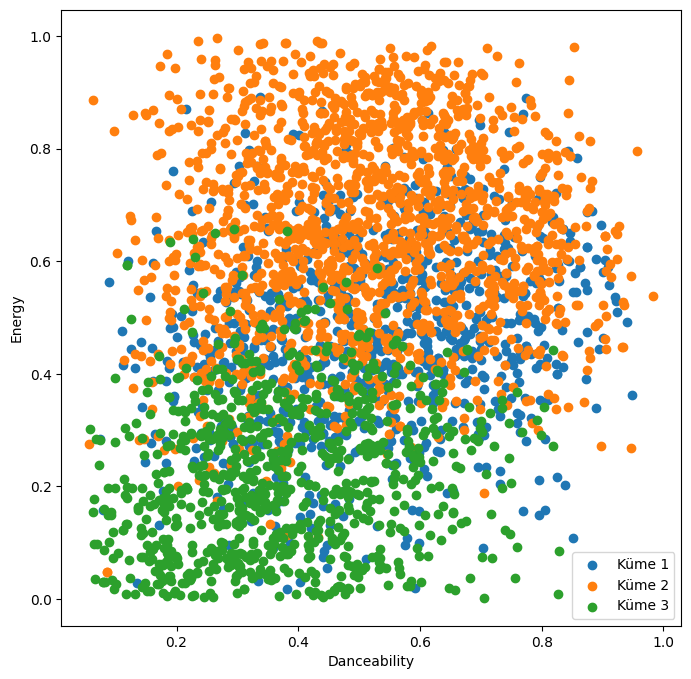

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
for i in range(kmeans.n_clusters):
    cluster_points = X[kmeans.labels_==i]
    ax.scatter(cluster_points['danceability'], cluster_points['energy'], label="Küme {}".format(i+1))
ax.legend()
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
plt.show()